# Filtering
### 1.1 Denoising

In [79]:
import cv2, math
import skimage as skimg
import numpy as np
import matplotlib.pyplot as plt

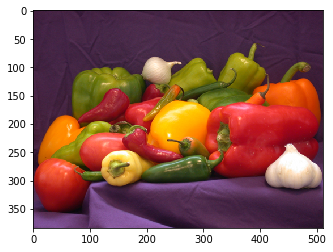

In [103]:
peppers = cv2.imread('./peppers.png')
peppers = cv2.cvtColor(peppers, cv2.COLOR_BGR2RGB)

plt.imshow(peppers)

### Gaussian Noise Peppers

#### 1. Filter the noisy image using a 7 x 7 Gaussian filter with variance equals to 2.

In [81]:
filter_size = 7

(Text(0.5, 1.0, 'Gaussian Filter'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

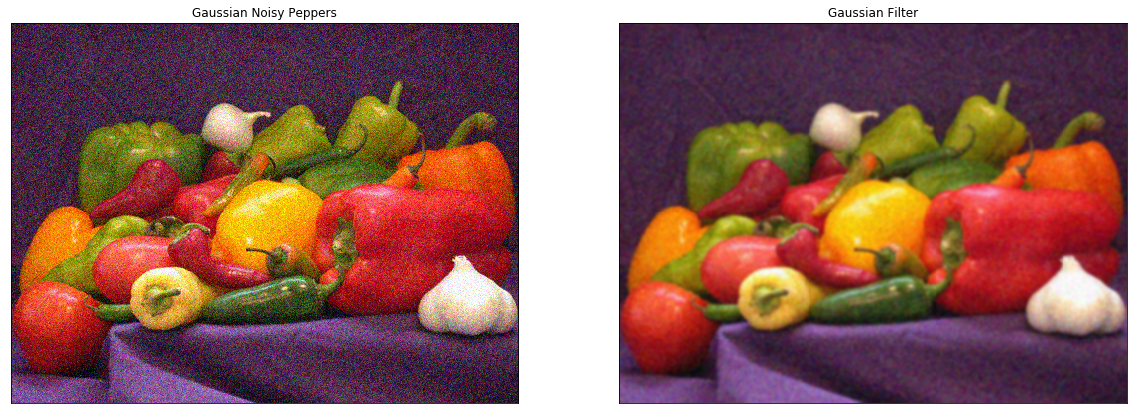

In [82]:
noisy_peppers = cv2.imread('./gaussian_noise_peppers.png')
noisy_peppers = cv2.cvtColor(noisy_peppers, cv2.COLOR_BGR2RGB)
denoised_gaussian_peppers = cv2.GaussianBlur(noisy_peppers, (filter_size, filter_size), math.sqrt(2)) # filter_size = 7

# plot
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(noisy_peppers)
plt.title("Gaussian Noisy Peppers"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(denoised_gaussian_peppers)
plt.title("Gaussian Filter"), plt.xticks([]), plt.yticks([])

#### 2. Filter the noisy image using a box filter of the same size.

(Text(0.5, 1.0, 'Box Filter'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

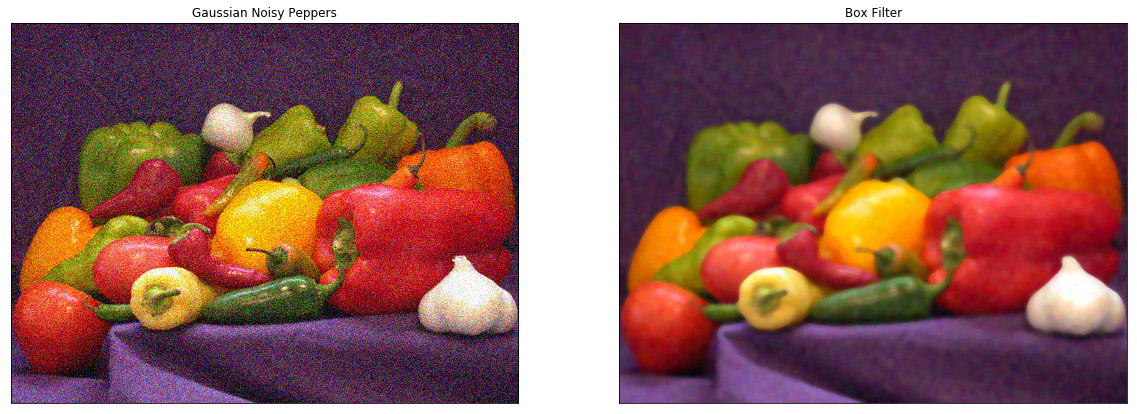

In [83]:
noisy_peppers = cv2.imread('./gaussian_noise_peppers.png')
noisy_peppers = cv2.cvtColor(noisy_peppers, cv2.COLOR_BGR2RGB)
denoised_box_peppers = cv2.medianBlur(noisy_peppers, filter_size) # filter_size = 7

# plot
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(noisy_peppers)
plt.title("Gaussian Noisy Peppers"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(denoised_box_peppers)
plt.title("Box Filter"), plt.xticks([]), plt.yticks([])

#### 3. Compare the PSNR of both of the denoised images to that of the clean image and state which method gives the superior result.

PSNR stands for peak signal-to-noise ratio, and it measure the quality between two images. The higher the PSNR the higher the quality of the reconstructed image compared to the original image. 

MSE = $\frac{\sum_{M, N} [I_1(m, n) - I_2(m, n)]^2}{M \cdot N}$

PSNR = $10 \cdot log_{10}(\frac{255^2}{MSE}) $

In [84]:
pnsr_gaussian = skimg.measure.compare_psnr(peppers, denoised_gaussian_peppers)
pnsr_box = skimg.measure.compare_psnr(peppers, denoised_box_peppers)

print("Gaussian Filter PSNR: ", pnsr_gaussian)
print("Box Filter PSNR: ", pnsr_box)

Gaussian Filter PSNR:  29.87927167099926
Box Filter PSNR:  29.443433762236996



The smoothing results are similar for both Gaussian and box filters. However, the original pepper image is corrupted with Gaussian noise, which falls under the frequency domain. While the box (median) filter performs best in reducing noise in spacial domain, it does not have the ability of separating frequencies. On the other hand, the Gaussian blur resembles a low-pass filter, as it convolutes the noisy image with a Gaussian distribution. Therefore, it is expected that the Gaussian blur works better than the median filter due to the nature of the noise. 


### Salt and peppers noise Peppers

#### 4. Filter the noisy image using the same Gaussian filter as used in the previous question.

(Text(0.5, 1.0, 'Gaussian Filter'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

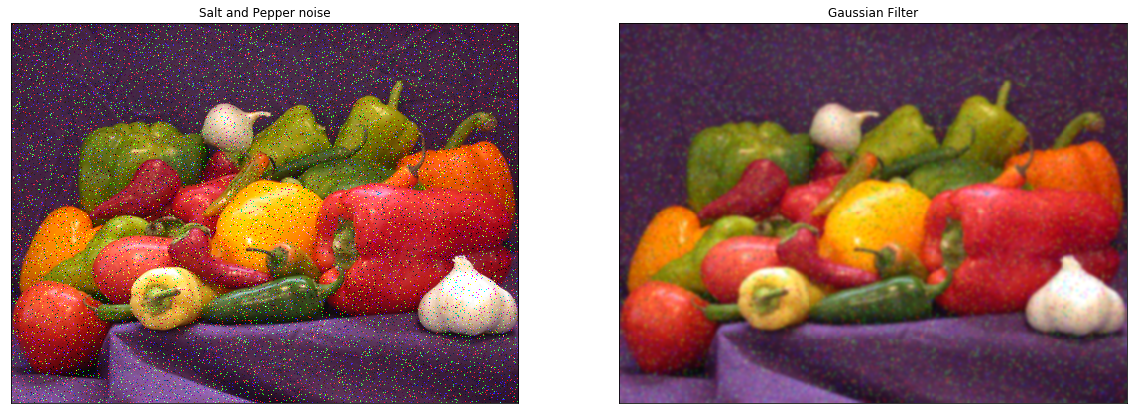

In [104]:
noisy_sap_peppers = cv2.imread('./saltandpepper_noise_peppers.png')
noisy_sap_peppers = cv2.cvtColor(noisy_sap_peppers, cv2.COLOR_BGR2RGB)
denoised_sap_gaussian = cv2.GaussianBlur(noisy_sap_peppers, 
                                         (filter_size, filter_size), # filter_size = 7
                                         math.sqrt(2)) 

# plot
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(noisy_sap_peppers)
plt.title("Salt and Pepper noise"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(denoised_sap_gaussian)
plt.title("Gaussian Filter"), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Median Filter'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

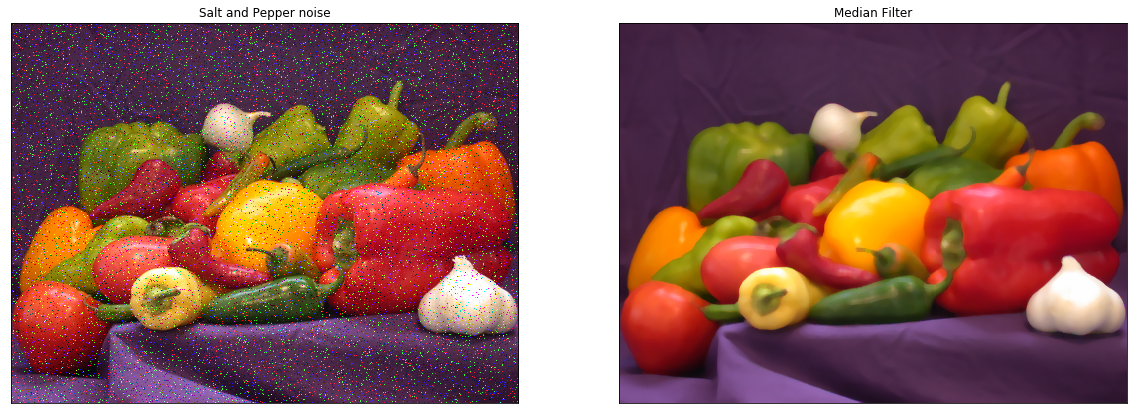

In [105]:
noisy_sap_peppers = cv2.imread('./saltandpepper_noise_peppers.png')
noisy_sap_peppers = cv2.cvtColor(noisy_sap_peppers, cv2.COLOR_BGR2RGB)
denoised_sap_median = cv2.medianBlur(noisy_sap_peppers, filter_size) # filter_size = 7

# plot
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(noisy_sap_peppers)
plt.title("Salt and Pepper noise"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(denoised_sap_median)
plt.title("Median Filter"), plt.xticks([]), plt.yticks([])

Gaussian Filter PSNR:  39.21844901741914
Median Filter PSNR:  31.871009920638333


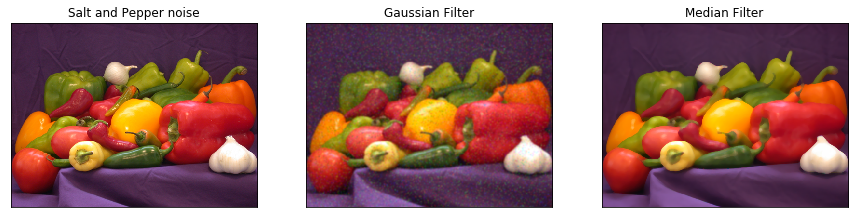

In [107]:
pnsr_gaussian = skimg.measure.compare_psnr(denoised_sap_gaussian, peppers)
pnsr_median = skimg.measure.compare_psnr(peppers, denoised_sap_median)

plt.figure(figsize=(15, 15))
plt.subplot(131), plt.imshow(peppers)
plt.title("Salt and Pepper noise"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(denoised_sap_gaussian)
plt.title("Gaussian Filter"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(denoised_sap_median)
plt.title("Median Filter"), plt.xticks([]), plt.yticks([])

print("Gaussian Filter PSNR: ", pnsr_gaussain)
print("Median Filter PSNR: ", pnsr_median)

The salt and peppers noise is random, thus in the spacial domain. Therefore, it is expected that the median filter performs better than the Gaussian filter. It smooths out the picture equally. 